runs log
- MLP baseline, train loss = 1.45, validation loss = 1.71 (https://github.com/SolbiatiAlessandro/ML-system-design/commit/c9685b1e5835a05f84c0592773dc9386268b762c)

# Environment

In [1]:
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

--2025-02-17 05:57:19--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.02s   

2025-02-17 05:57:19 (57.1 MB/s) - ‘input.txt’ saved [1115394/1115394]



In [191]:
import torch

# 1. Define a device variable. If a GPU is available, use it.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

import torch

# Check if CUDA is available
if torch.cuda.is_available():
    # Get the number of available CUDA devices
    num_devices = torch.cuda.device_count()
    print("Number of CUDA devices:", num_devices)

    # Get information about the current device
    current_device_id = torch.cuda.current_device()
    print("Current device ID:", current_device_id)

    # Get the name of the current device
    device_name = torch.cuda.get_device_name(current_device_id)
    print("Device name:", device_name)

    # Get detailed device properties
    device_props = torch.cuda.get_device_properties(current_device_id)
    print("Device properties:", device_props)

    # Get memory information
    memory_allocated = torch.cuda.memory_allocated(current_device_id)
    memory_reserved = torch.cuda.memory_reserved(current_device_id)
    print("Memory allocated:", memory_allocated)
    print("Memory reserved:", memory_reserved)
else:
    print("CUDA is not available.")

Using device: cuda
Number of CUDA devices: 1
Current device ID: 0
Device name: Quadro RTX 5000
Device properties: _CudaDeviceProperties(name='Quadro RTX 5000', major=7, minor=5, total_memory=16117MB, multi_processor_count=48)
Memory allocated: 18377728
Memory reserved: 532676608


In [200]:
!nvidia-smi

Mon Feb 17 07:24:30 2025       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.116.04   Driver Version: 525.116.04   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro RTX 5000     Off  | 00000000:00:05.0 Off |                  Off |
| 34%   37C    P2    42W / 230W |   1555MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [201]:
hyperparams = {
    'block_size': 10,
    'embedding_dim': 10,
    'hidden_layer': 10*10*5,
    'batch_size': 256*4,
    'epochs': 100000
}

# Shakespeare dataset

In [2]:
# read it in to inspect it
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [163]:
len(text)

1115394

In [166]:
characters = set()
for c in text:
    characters.add(c)
vocab_size = len(characters)
int_to_characters = {i: c for i, c in enumerate(characters)}
characters_to_int = {c: i for i, c in enumerate(characters)}

CONTEXT_WINDOW = hyperparams['block_size']

X, y = [], []
k = 0
X_train, X_test, y_train, y_test = [], [], [], []
for k in range(int(len(text) * 0.90)):
    xx = text[k:k+CONTEXT_WINDOW]
    yy = text[k+CONTEXT_WINDOW]

    X_train.append([characters_to_int[c] for c in xx])
    y_train.append(characters_to_int[yy])

for k in range(int(len(text) * 0.92), len(text) - 2*CONTEXT_WINDOW):
    xx = text[k:k+CONTEXT_WINDOW]
    yy = text[k+CONTEXT_WINDOW]

    X_test.append([characters_to_int[c] for c in xx])
    y_test.append(characters_to_int[yy])


In [193]:
import torch
X_train, y_train = torch.tensor(X_train, device=device), torch.tensor(y_train, device=device)
X_train.shape, y_train.shape

/tmp/ipykernel_104/3705377515.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train, y_train = torch.tensor(X_train, device=device), torch.tensor(y_train, device=device)


(torch.Size([1003854, 10]), torch.Size([1003854]))

In [194]:
X_val, y_val = torch.tensor(X_test, device=device), torch.tensor(y_test, device=device)
X_val.shape, y_val.shape

(torch.Size([89212, 10]), torch.Size([89212]))

In [116]:
ix = torch.randint(0, X_train.shape[0], (4,))
X_train[ix], y_train[ix]

(tensor([[56, 20, 10, 40,  6, 21, 39, 35, 61, 20],
         [20,  8, 26, 40,  6, 19, 32, 19, 58, 56],
         [20, 11, 21, 20, 11, 25, 20, 28, 32, 11],
         [61, 33, 28, 21, 39, 32, 12, 39, 21, 35]]),
 tensor([ 8, 45, 21, 20]))

In [233]:
print(vocab_size)

65


# Model

In [20]:
from torch import nn

In [19]:
# input
# embedding layer
# masked multi hjead attention 
# add and norm
# feed forward
# add norm
# linear
# softmax
# probabilities

In [202]:
embedding_dim = hyperparams['embedding_dim']
block_size = hyperparams['block_size']
batch_size = hyperparams['batch_size']
hidden_layer_size = hyperparams['hidden_layer']
epochs = hyperparams['epochs']

In [227]:
model = nn.Sequential(
    nn.Embedding(vocab_size, embedding_dim, device=device),
    nn.Flatten(),
    nn.Linear(embedding_dim * block_size, hidden_layer_size, device=device),
    nn.ReLU(),
    nn.Linear(hidden_layer_size, hidden_layer_size, device=device),
    nn.ReLU(),
    nn.Linear(hidden_layer_size, vocab_size, device=device)
)

for p in model.parameters():
    p.require_grad = True
sum(len(p) for layer in model for p in layer.parameters())

2195

In [257]:
ix = torch.randint(0, X_train.shape[0], (1,))
x, y = X_train[ix], y_train[ix]
x.shape

torch.Size([1, 10])

In [255]:
x

tensor([[56, 32, 20,  8, 40, 11, 14, 35, 33, 30]], device='cuda:0')

In [258]:
x = model[0](x)
x.shape

torch.Size([1, 10, 10])

In [262]:
W1 = torch.randn(10, 64, device=device)

In [263]:
x @ W1

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x100 and 10x64)

In [246]:
query = nn.Linear(embedding_dim*block_size, attention_size, device=device)
keys = nn.Linear(embedding_dim*block_size, attention_size, device=device)
values = nn.Linear(embedding_dim*block_size, attention_size, device=device)

In [247]:
q = query(x)
k = keys(x)

In [252]:
(q @ k.T).shape

torch.Size([1024, 1024])

In [228]:
lossi, vlossi = [], []

for i in range(30000):
    # forward pass
    ix = torch.randint(0, X_train.shape[0], (batch_size,))
    x, y = X_train[ix], y_train[ix]
    x = model(x)
    loss = nn.functional.cross_entropy(x, y)
    

    for p in model.parameters():
        p.grad = None

    # backward pass
    loss.backward()
    
    lr = 0.1 if i < 15000 else 0.01
    for p in model.parameters():
        p.data -= lr * p.grad
        
    lossi.append(loss.item())
    if i % 250 == 0:
        with torch.no_grad():
            # validation loss
            logits_val = model(X_val)
            loss_val = nn.functional.cross_entropy(logits_val, y_val)
            vlossi.append(loss_val.item())
            
            if i % 1000 == 0:
                print(f"{i}: train loss = {loss.item():.2f}, validation loss = {loss_val.item():2f}")

0: train loss = 4.185055732727051, validation loss = 4.141956329345703
1000: train loss = 2.377685070037842, validation loss = 2.4429502487182617
2000: train loss = 2.231973171234131, validation loss = 2.2896788120269775
3000: train loss = 2.082155704498291, validation loss = 2.1420059204101562
4000: train loss = 1.9366093873977661, validation loss = 2.022430181503296
5000: train loss = 1.8920868635177612, validation loss = 1.9656044244766235
6000: train loss = 1.784192442893982, validation loss = 1.9314466714859009
7000: train loss = 1.760754108428955, validation loss = 1.8996379375457764
8000: train loss = 1.674952507019043, validation loss = 1.8834093809127808
9000: train loss = 1.6659841537475586, validation loss = 1.8579070568084717
10000: train loss = 1.6491072177886963, validation loss = 1.8419277667999268
11000: train loss = 1.611682415008545, validation loss = 1.8020172119140625
12000: train loss = 1.560142159461975, validation loss = 1.7966078519821167
13000: train loss = 1.6

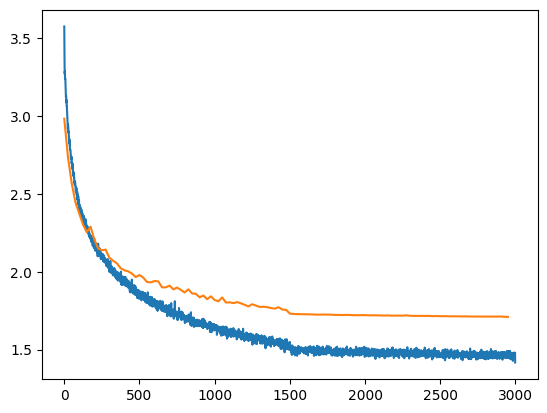

In [229]:
from matplotlib import pyplot as plt
plt.plot(torch.tensor(lossi).view(-1, 10).mean(1)[1:])
plt.plot([25*x for x in range(len(vlossi[1:]))], vlossi[1:])